## TP sur implémentation des méthodes numérique de résolution d'équations 

In [1]:
import numpy as np

# Tout au long de ce TP, je ferai les tests des differentes methodes de resolution sur les deux fonctions suivantes:
def f(x):
    return np.exp(-x / 10) - x

def g(x):
    return x**3 - x - 2

### Dichotomie

In [2]:
"""def dichotomie(a,b,funct,p):
    i = 0
    while (b-a) > p:
        alpha = (a+b)/2
        if (funct(a) * funct(b)) < 0:
            b = alpha
        else:
            a = alpha
        i += 1
    print("a:",a,"  b:",b,"  alpha:",alpha, "  Nombre d'itération:", i)"""

def dichotomie(funct, a, b, precision):
    i = 0
    while (b - a) > precision:
        alpha = (a + b) / 2
        if funct(a) * funct(alpha) < 0:
            b = alpha
        else:
            a = alpha
        i += 1
    return ((a, b), i)

In [3]:
result_dichotomie_f = dichotomie(lambda x: np.exp(-x / 10) - x, 0, 4, 10**-4)
result_dichotomie_g = dichotomie(lambda x: x**3 - x - 2, 1, 2, 10**-4)

In [4]:
result_dichotomie_f

((0.9127197265625, 0.91278076171875), 16)

In [5]:
result_dichotomie_g

((1.5213623046875, 1.52142333984375), 14)

La méthode de dichotomie est simple et elle convergerge vers une racine si elle est contenue dans l'intervalle initial. Elle nécessite un nombre d'itérations modéré pour atteindre la précision souhaitée 10**-4 avec 16 itérations pour f(x) et 14 pour g(x).

Elle n'est pas la plus rapide. La précision est systématiquement améliorée à chaque itération.

Cette méthode nécessite que la fonction change de signe sur l'intervalle choisi et peut être plus lente comparée à d'autres méthodes pour des fonctions complexes ou des précisions très élevées.

### Lagrange

In [6]:
def lagrange(funct, a, b, p):
    i=0
    while np.abs(b-a) > p:
        c = a - ((a - b) / (funct(a)-funct(b))) * funct(a)
        if funct(a) * funct(c) > 0:
            a, b = c,b
        else:
            b, a= c, a
        i+=1
    return((a, b), i)

J'ai rencontré des problèmes lorsque je le fais avec la fonction f(x) dont je n'ai pas trouvé de solution car il y'a une execution en boucle infinie jusqu'à l'arrêt de la machine.

In [7]:
result_lagrange_g = lagrange(lambda x: x**3 - x - 2, 1, 2, 10**-4)

In [8]:
result_lagrange_g

((1.5213797068045674, 1.5213797068045676), 30)

In [9]:
result_lagrange_g

((1.5213797068045674, 1.5213797068045676), 30)

### Sécante

In [10]:
"""import numpy as np
def secante(a, b, funct, p):
    i = 0
    while np.abs(b-a) > p:
        c = b - ((b-a) /(funct(b) - funct(a))) * funct(b)
        a, b = b, c
        i+=1
    print("a:",a,"  b:",b, "  Nombre d'itération:", i)"""

def secante(funct, a, b, precision):
    i = 0
    while np.abs(b - a) > precision:
        c = b - ((b - a) / (funct(b) - funct(a))) * funct(b)
        a, b = b, c
        i += 1
    return ((a, b), i)

In [11]:
result_secante_f = secante(lambda x: np.exp(-x / 10) - x, 0, 4, 10**-4)
result_secante_g = secante(lambda x: x**3 - x - 2, 1, 2, 10**-4)

In [12]:
result_secante_f

((0.9127652776832881, 0.912765271608626), 4)

In [13]:
result_secante_g

((1.5213763166697438, 1.5213797079848717), 6)

J'observe que la secante atteint rapidement la précision souhaitée sans avoir besoin d'un intervalle initial contenant la racine.

### Newton

In [14]:
def derivative(funct, x, eps=1e-6):
    return (funct(x+eps) - funct(x-eps)) / (2*eps)

"""def newton(funct, x, precision, differential = None):
    i = 0
    a = x
    d = differential(x) if differential else derivative(funct, x)
    b = x - funct(x)/ d
    while abs(b-a) > precision:
        i = i + 1
        d = differential(b) if differential else derivative(funct, b)
        (a,b) = (b, b-funct(b)/d)
        print(a,b)
    return ((a,b),i,funct((a+b)/2))"""
def newton(funct, x, precision):
    i = 0
    while True:
        dx = derivative(funct, x)
        x_suiv = x - funct(x) / dx
        if abs(x_suiv - x) < precision:
            break
        x = x_suiv
        i += 1
    return (x, i)

In [15]:
result_newton_f = newton(lambda x: np.exp(-x / 10) - x, 2, 10**-4) 
result_newton_g = newton(lambda x: x**3 - x - 2, 1.5, 10**-4) 

In [16]:
result_newton_f

(0.9127651815676986, 2)

In [17]:
result_newton_g

(1.5213798059647654, 2)

Elle est la plus rapide avec seulement 2 itérations nécessaires pour atteindre la précision souhaitée pour les deux fonctions. La convergence est très rapide et précise.

### Point Fixe

In [18]:
def point_fixe(funct,x,precision):
    i=0
    while abs(funct(x)-x) > precision:
        i+=1
        x = funct(x)
    return x,i

"""
def point_fixe(funct, x, precision):
    i = 0
    while True:
        x_new = funct(x)
        if abs(x_new - x) < precision:
            break
        x = x_new
        i += 1
    return (x, i)"""

'\ndef point_fixe(funct, x, precision):\n    i = 0\n    while True:\n        x_new = funct(x)\n        if abs(x_new - x) < precision:\n            break\n        x = x_new\n        i += 1\n    return (x, i)'

In [19]:
result_point_fixe_f = point_fixe(lambda x: np.exp(-x / 10) - x, 2, 10**-4)
result_point_fixe_g = point_fixe(lambda x: x**3 - x - 2, -1.5, 10**-4)

C:\Users\konta\AppData\Local\Temp\ipykernel_11644\1603289363.py:1: RuntimeWarning: overflow encountered in exp
  result_point_fixe_f = point_fixe(lambda x: np.exp(-x / 10) - x, 2, 10**-4)


KeyboardInterrupt: 

### Comparaison avec les méthodes proposées au sein du module scipy.optimize

In [20]:
import scipy.optimize as opt

tol = 1e-4

scipy_results_f = {
    'bisect_f': opt.bisect(f, 0, 2, xtol=tol),
    'newton_f': opt.newton(f, 1, tol=tol),
}


scipy_results_g = {
    'bisect_h': opt.bisect(g, 0, 10, xtol=tol),
    'newton_h': opt.newton(g, 1, tol=tol),
}

In [21]:
print(result_dichotomie_f)
print(result_newton_f)
scipy_results_f

((0.9127197265625, 0.91278076171875), 16)
(0.9127651815676986, 2)


{'bisect_f': 0.91278076171875, 'newton_f': 0.9127652831838142}

In [22]:
print(result_dichotomie_g)
print(result_newton_g)
scipy_results_g

((1.5213623046875, 1.52142333984375), 14)
(1.5213798059647654, 2)


{'bisect_h': 1.5213775634765625, 'newton_h': 1.5213797079773523}

## Conclusion

Chaque méthode numérique a ses forces et ses faiblesses, et le choix de la méthode dépend de la nature de la fonction.
La méthode de Newton et la méthode de la Sécante ont montré une grande efficacité en termes de vitesse de convergence, tandis que la méthode de dichotomie offreconvergence plus lente. Pour la méthode de Lagrange, notre expérience montre qu'elle peut aussi présenter des problèmes en termes de convergence.

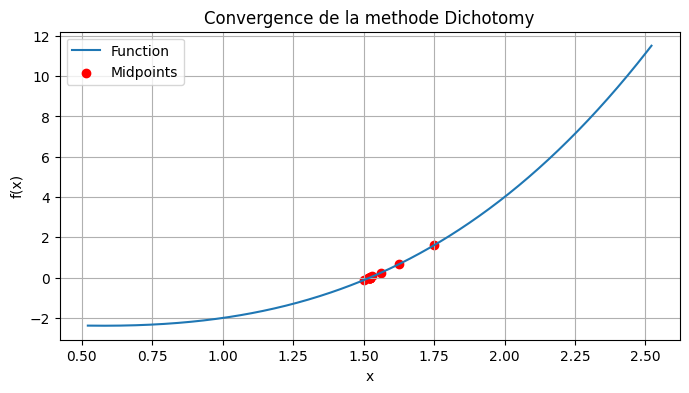

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dichotomie(funct, a, b, precision):
    points = []
    i = 0
    while (b - a) > precision:
        alpha = (a + b) / 2
        points.append(alpha)  
        if funct(a) * funct(alpha) < 0:
            b = alpha
        else:
            a = alpha
        i += 1
    x = np.linspace(a-1, b+1, 400)
    y = funct(x)
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, label='Function')
    plt.scatter(points, [funct(p) for p in points], color='red', label='Midpoints')
    plt.title('Convergence de la methode Dichotomy')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_dichotomie(lambda x: x**3 - x - 2, 1, 2, 10**-4)
